
# Project: Investigating No-Show Appointments DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Hello , I will be Working on No-Show Appointments Data Set , I am going to explore the data and see what are relations between the not showing on the Appointment and many variables like the gender , age or another thing . we will try to collerate these variables on this notebook  

>The data ( Csv file) uploaded into the workspace

In [1]:

# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
no_show = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

# printing top rows to explore data
no_show.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# printing the shape of the Data
no_show.shape

(110527, 14)

In [4]:
#more info about the data
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
no_show.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>From the above we can see no missing data and no nulls
##### But do we need PatientID or AppointmentID? No we dont , so we will drop them on the cleaning part

In [6]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the above description i noticed some points 
##### Why do we have negative age? need to be explored and cleaned
##### Max value of handcap is 4? it shoule be either 0 or 1 as per kaggle page , need to explored and cleaned


In [7]:
no_show.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> As expected we found 5 values of Handcap instead of 2 

In [8]:
no_show.Handcap.unique()

array([0, 1, 2, 3, 4])

> We have wrong values , lets count them

In [9]:
no_show[no_show.Handcap > 1].count()

PatientId         199
AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

> 199 row with wrong values , we can drop them at the cleaning part , lets explore age

In [10]:
no_show[no_show.Age < 0].count()

PatientId         1
AppointmentID     1
Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

>only one negative value which we can drop in the cleaning part

In [11]:
no_show.duplicated().sum()

0

> We dont have duplicated rows , but maybe we need to check again after cleaning the data

### Data Cleaning
##### After exploring the data we need to clean 3 things
##### 1) Drop PatientId and AppointmentID 
##### 2) Drop rows with Handcap values more than 1
##### 3) Drop rows with age less than 1

In [12]:
no_show.drop(["PatientId","AppointmentID"],axis=1,inplace=True)

In [13]:
deleteage = no_show[no_show['Age'] < 0 ].index
deleteHandcap=no_show[no_show['Handcap'] > 1 ].index

no_show.drop(deleteage,axis=0,inplace=True)
no_show.drop(deleteHandcap,axis=0,inplace=True)    

In [14]:
no_show.duplicated().sum()

632

> Now we have duplicated rows ( with exact times ! , we need to drop them as well)

In [15]:
no_show.drop_duplicates(inplace=True)

In [16]:
#Creating Masks for easier data analysis

Noshow=no_show['No-show'] == 'Yes'
show=no_show['No-show'] == 'No'


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is no showing related to age & gender?)

> Here we are going to plot age verse show and no show , one time standalone and one time overlapped also we are going to calculate the mean age of not showing vs mean age of showing

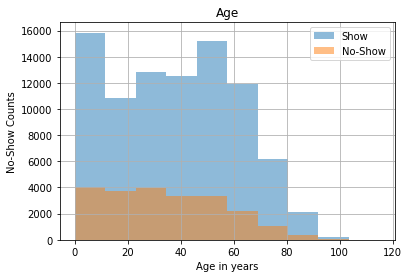

In [17]:
no_show.Age[show].hist(alpha=0.5,label = 'Show')
no_show.Age[Noshow].hist(alpha=0.5,label = 'No-Show')
plt.legend();
plt.ylabel('No-Show Counts');
plt.xlabel('Age in years');
plt.title('Age');

In [18]:
no_show.Gender[Noshow].value_counts()

F    14429
M     7628
Name: Gender, dtype: int64

In [19]:
no_show.Gender[show].value_counts()

F    56879
M    30759
Name: Gender, dtype: int64

In [20]:
no_show.Age[show].mean()

37.783324585225586

In [21]:
no_show.Age[Noshow].mean()

34.244910912635447

### Research Question 2  (Is There any medical case that makes people dont show up)?

> Here we are plotting no-show counts & % of no showing cases , to conclude if any case is most likely the user will not appear

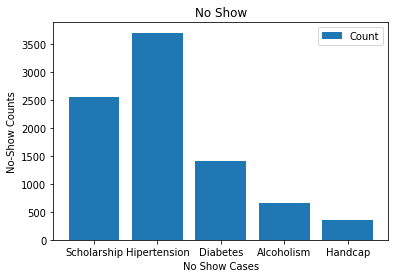

In [22]:

X=no_show.Scholarship[Noshow].value_counts()[1]
Y=no_show.Hipertension[Noshow].value_counts()[1]
Z=no_show.Diabetes[Noshow].value_counts()[1]
A=no_show.Alcoholism[Noshow].value_counts()[1]
B=no_show.Handcap[Noshow].value_counts()[1]
noshowsum=X+Y+Z+A+B

plt.bar([1, 2, 3,4,5], [X, Y, Z, A, B], tick_label=['Scholarship', 'Hipertension', 'Diabetes','Alcoholism','Handcap'])
plt.title('No Show')
plt.xlabel('No Show Cases')
plt.ylabel('No-Show Counts');
plt.legend(['Count']);

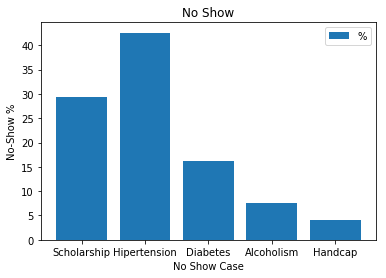

In [23]:

X1=no_show.Scholarship[Noshow].value_counts()[1]/noshowsum*100
Y1=no_show.Hipertension[Noshow].value_counts()[1]/noshowsum*100
Z1=no_show.Diabetes[Noshow].value_counts()[1]/noshowsum*100
A1=no_show.Alcoholism[Noshow].value_counts()[1]/noshowsum*100
B1=no_show.Handcap[Noshow].value_counts()[1]/noshowsum*100





plt.bar([1, 2, 3,4,5], [X1, Y1, Z1, A1, B1], tick_label=['Scholarship', 'Hipertension', 'Diabetes','Alcoholism','Handcap'])
plt.title('No Show')
plt.xlabel('No Show Case')
plt.ylabel('No-Show %');
plt.legend(['%']);

## Conclusion here 

## For Age younger people sligthly tends to not showing (based on mean values histograms
## Also most of the no show are females 
## After plotting both counts and % of not showing up, that people with hipertension tends to no show more than any other case

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0